### Libraries Importing

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Data Loading

In [25]:
# Load the dataset
data = pd.read_excel('MoviesOnStreamingPlatform.xlsx')
data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,0.96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN


### Data Understanding

In [26]:
# Display the first few rows of the dataset
print(data.head())

   ID                           Title  Year  Age  IMDb  Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             0.87   
1   2                      The Matrix  1999  18+   8.7             0.87   
2   3          Avengers: Infinity War  2018  13+   8.5             0.84   
3   4              Back to the Future  1985   7+   8.5             0.96   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             0.97   

   Netflix  Hulu  Prime Video  Disney+                       Directors  \
0        1     0            0        0               Christopher Nolan   
1        1     0            0        0  Lana Wachowski,Lilly Wachowski   
2        1     0            0        0         Anthony Russo,Joe Russo   
3        1     0            0        0                 Robert Zemeckis   
4        1     0            1        0                    Sergio Leone   

                             Genres                       Country  \
0  Action,Adventure,Sci-Fi,Thriller

In [27]:
# Display information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   float64
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16130 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 1.9+ MB
None
                 ID          Year         

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64


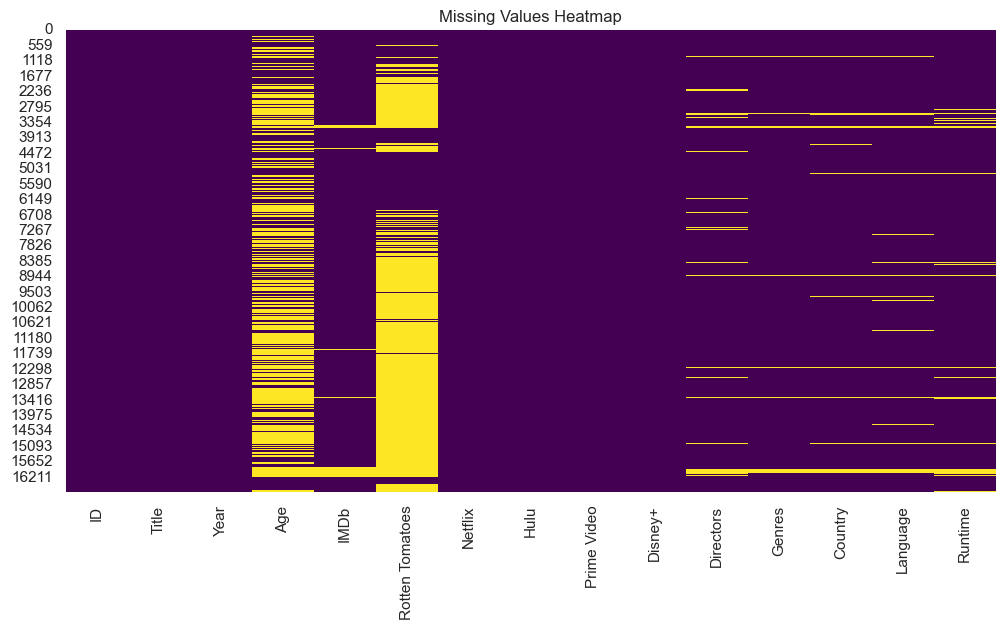

In [28]:
# Overview of missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Data Preprocessing

In [29]:
# Handling missing values
data.dropna(subset=['ID', 'Title'], inplace=True)
data.fillna({'Age': 'Unknown', 'Directors': 'Unknown', 'Genres': 'Unknown', 'Country': 'Unknown', 'Language': 'Unknown'}, inplace=True)

# Convert binary columns to boolean
data['Netflix'] = data['Netflix'].astype(bool)
data['Hulu'] = data['Hulu'].astype(bool)
data['Prime Video'] = data['Prime Video'].astype(bool)
data['Disney+'] = data['Disney+'].astype(bool)

# Creating additional columns
data['Number of Platforms'] = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Number of Platforms
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,0.87,True,False,False,False,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,True,False,False,False,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,0.96,True,False,False,False,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,True,False,True,False,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,Unknown,6.2,NaN,False,False,False,True,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,1
16740,16741,The Poof Point,2001,7+,4.7,NaN,False,False,False,True,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,1
16741,16742,Sharks of Lost Island,2013,Unknown,5.7,NaN,False,False,False,True,Neil Gelinas,Documentary,United States,English,NaN,1
16742,16743,Man Among Cheetahs,2017,Unknown,6.6,NaN,False,False,False,True,Richard Slater-Jones,Documentary,United States,English,NaN,1


In [30]:
# Store data
data.to_csv('cleanedMoviesOnStreamingPlatform.csv', index=False)

In [8]:
# Handle multivalue columns

# Helper function to strip whitespace and split the values
def clean_and_split(column):
    return column.str.split(',').apply(lambda x: [i.strip() for i in x])

# Apply the function to the relevant columns
data['Directors'] = clean_and_split(data['Directors'])
data['Genres'] = clean_and_split(data['Genres'])
data['Country'] = clean_and_split(data['Country'])
data['Language'] = clean_and_split(data['Language'])

# Initialize MultiLabelBinarizer for each column
mlb_directors = MultiLabelBinarizer()
mlb_genres = MultiLabelBinarizer()
mlb_country = MultiLabelBinarizer()
mlb_language = MultiLabelBinarizer()

# Apply MultiLabelBinarizer to each multi-value column and add a prefix for clarity
directors_encoded = pd.DataFrame(mlb_directors.fit_transform(data['Directors']), columns=["Director_" + col for col in mlb_directors.classes_], index=data.index)
genres_encoded = pd.DataFrame(mlb_genres.fit_transform(data['Genres']), columns=["Genre_" + col for col in mlb_genres.classes_], index=data.index)
country_encoded = pd.DataFrame(mlb_country.fit_transform(data['Country']), columns=["Country_" + col for col in mlb_country.classes_], index=data.index)
language_encoded = pd.DataFrame(mlb_language.fit_transform(data['Language']), columns=["Language_" + col for col in mlb_language.classes_], index=data.index)

# Concatenate the original data with the new one-hot encoded columns
data = pd.concat([data, directors_encoded, genres_encoded, country_encoded, language_encoded], axis=1)

# Drop the original multi-value columns
data.drop(columns=['Directors', 'Genres', 'Country', 'Language'], inplace=True)

data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Language_Ukrainian,Language_Unknown,Language_Urdu,Language_Vietnamese,Language_Welsh,Language_Wolof,Language_Xhosa,Language_Yiddish,Language_Yoruba,Language_Zulu
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2,The Matrix,1999,18+,8.7,0.87,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,0.84,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,4,Back to the Future,1985,7+,8.5,0.96,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,0.97,True,False,True,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,Unknown,6.2,NaN,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
16740,16741,The Poof Point,2001,7+,4.7,NaN,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
16741,16742,Sharks of Lost Island,2013,Unknown,5.7,NaN,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
16742,16743,Man Among Cheetahs,2017,Unknown,6.6,NaN,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Store data
data.to_csv('singleValuedMoviesOnStreamingPlatform.csv', index=False)

In [31]:
# Define a function to preprocess the columns
def preprocess_column(df, column_name):
    df[column_name] = df[column_name].str.split(',')
    df = df.explode(column_name).dropna()
    df[column_name] = df[column_name].str.strip()
    return df

# Apply the function to each multi-value column
columns_to_preprocess = ['Directors', 'Genres', 'Country', 'Language']
for column in columns_to_preprocess:
    data = preprocess_column(data, column)

data

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Number of Platforms
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,Action,United States,English,148.0,1
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,Action,United States,Japanese,148.0,1
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,Action,United States,French,148.0,1
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,Action,United Kingdom,English,148.0,1
0,1,Inception,2010,13+,8.8,0.87,True,False,False,False,Christopher Nolan,Action,United Kingdom,Japanese,148.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16719,16720,Pocahontas,1995,Unknown,5.3,0.55,False,False,False,True,Eric Goldberg,Family,United States,Algonquin,81.0,1
16719,16720,Pocahontas,1995,Unknown,5.3,0.55,False,False,False,True,Eric Goldberg,Musical,United States,English,81.0,1
16719,16720,Pocahontas,1995,Unknown,5.3,0.55,False,False,False,True,Eric Goldberg,Musical,United States,Algonquin,81.0,1
16719,16720,Pocahontas,1995,Unknown,5.3,0.55,False,False,False,True,Eric Goldberg,Romance,United States,English,81.0,1


In [33]:
# Save the preprocessed data to a new CSV file
data.to_csv('listValuedMoviesOnStreamingPlatform.csv', index=False)

### Exploratory Data Analysis (EDA)

In [10]:
# Load cleaned data
data = pd.read_csv('cleanedMoviesOnStreamingPlatform.csv')

# Set plot style
sns.set(style="whitegrid")


#### 1. Missing Values Analysis

ID                         0
Title                      0
Year                       0
Age                        0
IMDb                     571
Rotten Tomatoes        11586
Netflix                    0
Hulu                       0
Prime Video                0
Disney+                    0
Directors                  0
Genres                     0
Country                    0
Language                   0
Runtime                  592
Number of Platforms        0
dtype: int64


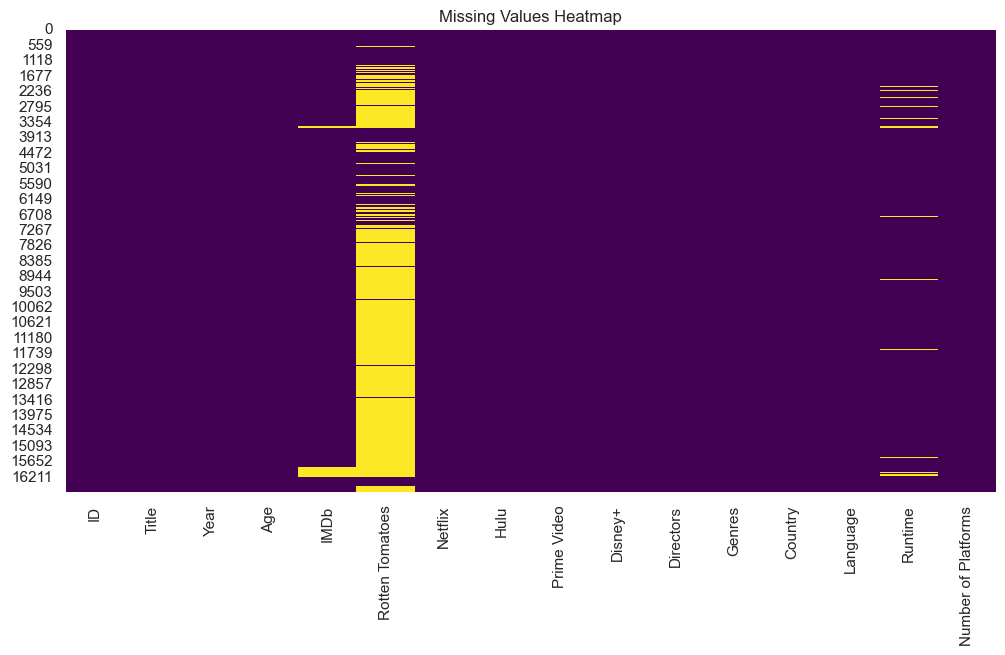

In [11]:
# Overview of missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


#### 2. Correlation Analysis

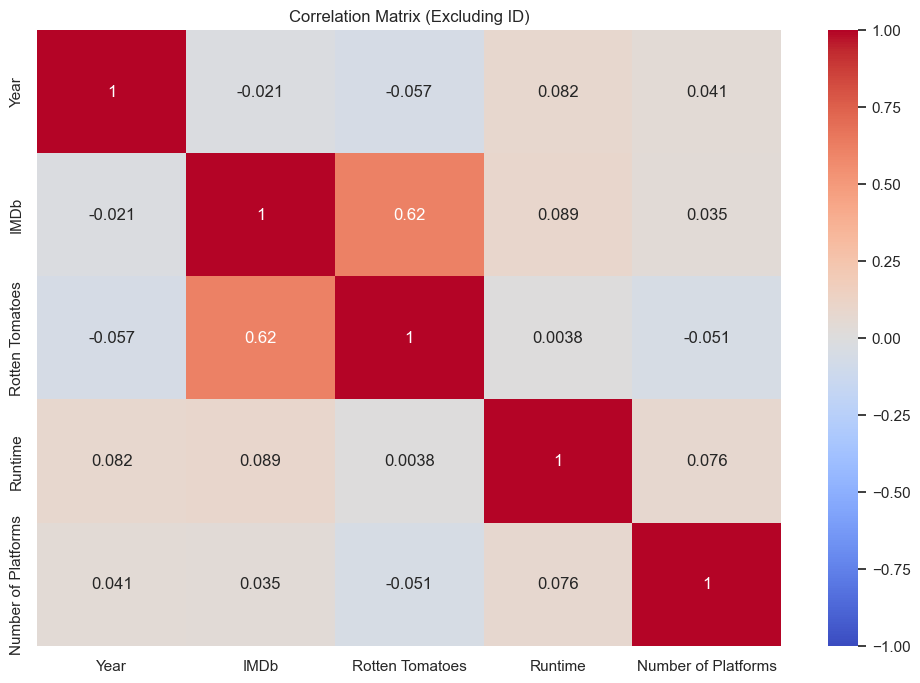

Correlation between IMDb and Rotten Tomatoes: 0.6163204883344207


In [12]:
# Remove the ID column from correlation analysis
numeric_data = data.select_dtypes(include=['number']).drop(columns=['ID'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Excluding ID)')
plt.show()

# Focus on correlation between IMDb and Rotten Tomatoes ratings
if 'IMDb' in correlation_matrix.columns and 'Rotten Tomatoes' in correlation_matrix.columns:
    print("Correlation between IMDb and Rotten Tomatoes:", correlation_matrix.loc['IMDb', 'Rotten Tomatoes'])
else:
    print("Columns 'IMDb' and 'Rotten Tomatoes' are not present in the correlation matrix.")


#### 3. Grouped Analysis

C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\2013571972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')


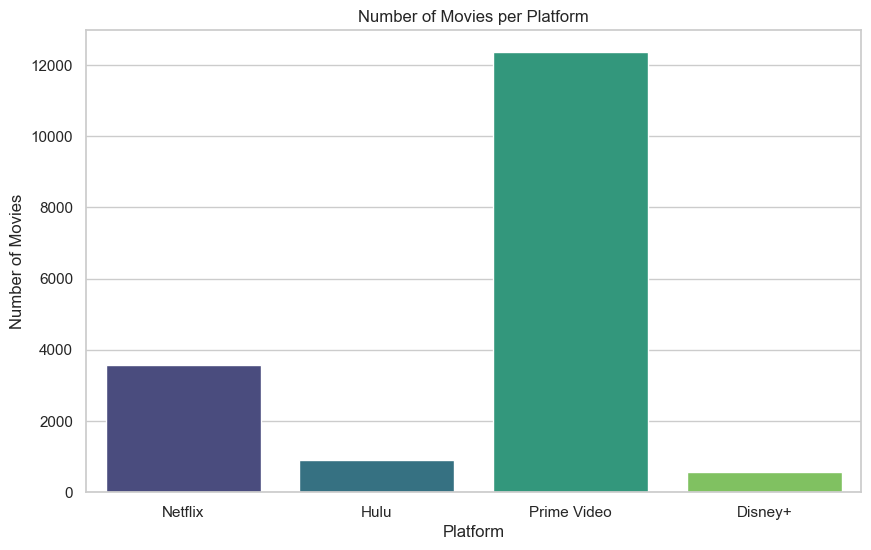

In [13]:
# Number of Movies per Platform
platform_counts = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Number of Movies per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Movies')
plt.show()


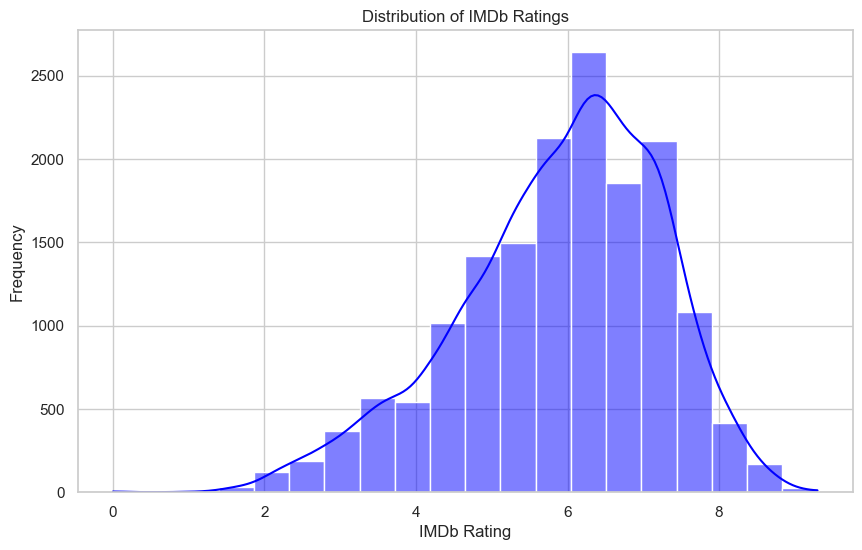

In [14]:
# Distribution of IMDb Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['IMDb'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


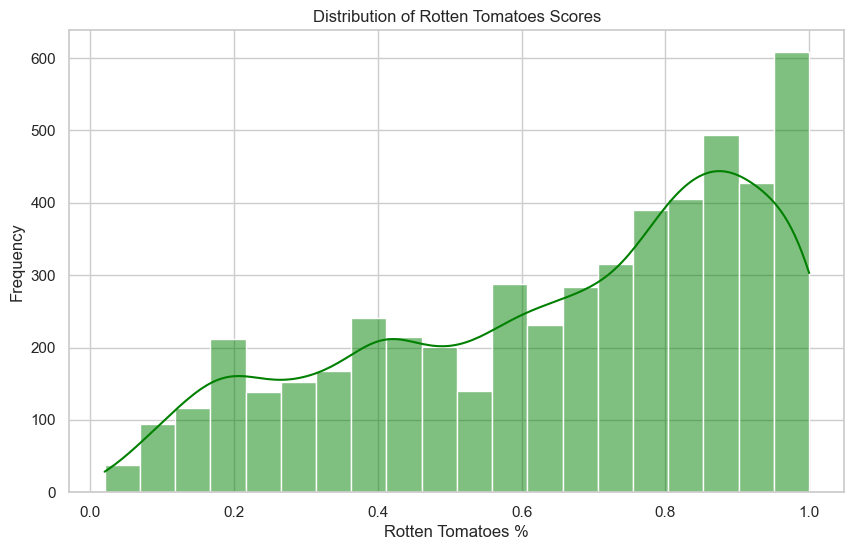

In [15]:
# Distribution of Rotten Tomatoes Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Rotten Tomatoes'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes %')
plt.ylabel('Frequency')
plt.show()


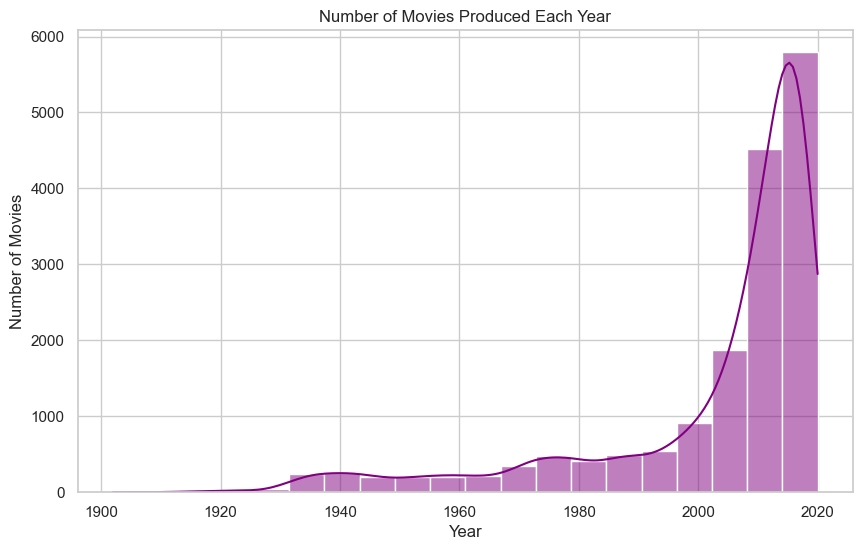

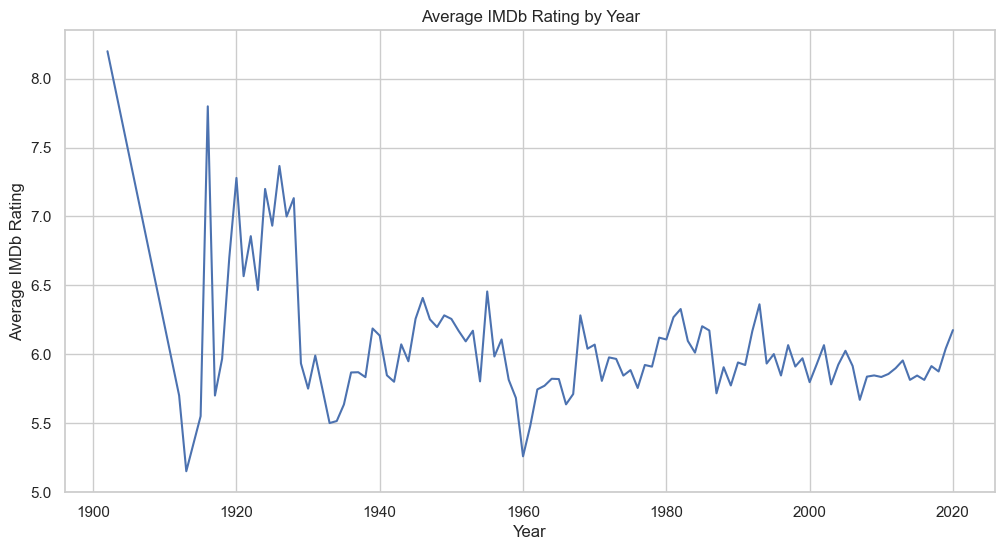

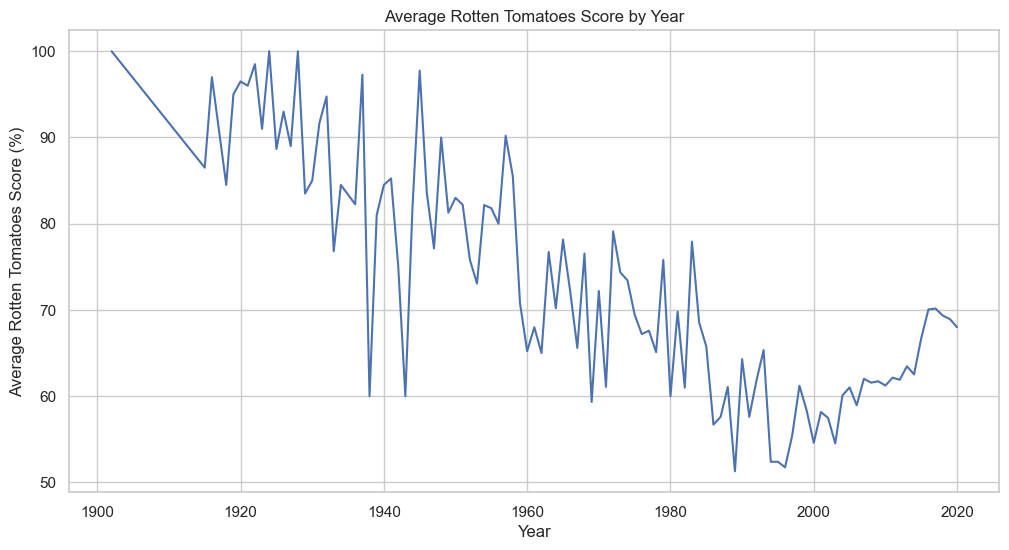

In [16]:
# Year-wise Distribution of Movies
plt.figure(figsize=(10, 6))
sns.histplot(data['Year'].dropna(), bins=20, kde=True, color='purple')
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Average IMDb ratings by year
yearly_imdb = data.groupby('Year')['IMDb'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='IMDb', data=yearly_imdb)
plt.title('Average IMDb Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.show()

# Average Rotten Tomatoes scores by year
if data['Rotten Tomatoes'].max() <= 1:
    data['Rotten Tomatoes'] = data['Rotten Tomatoes'] * 100
yearly_rotten_tomatoes = data.groupby('Year')['Rotten Tomatoes'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rotten Tomatoes', data=yearly_rotten_tomatoes)
plt.title('Average Rotten Tomatoes Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Rotten Tomatoes Score (%)')
plt.show()


C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\1596445484.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df.sort_values(by='Count', ascending=False).head(20), palette='coolwarm')


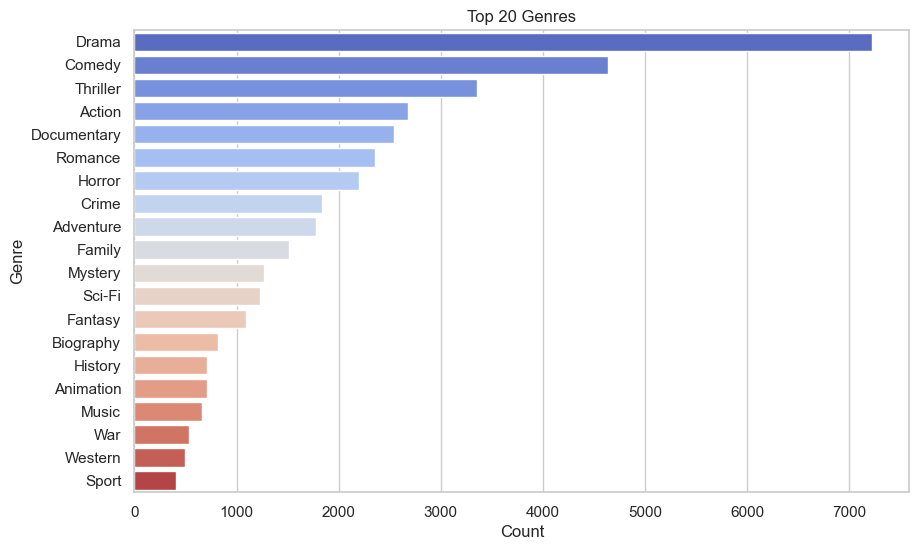

In [17]:
# Genre Distribution
# Since genres are a comma-separated list, we need to split and count them

genre_list = data['Genres'].dropna().str.split(',').tolist()
genre_counts = Counter([genre.strip() for sublist in genre_list for genre in sublist])
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index').reset_index()
genre_df.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_df.sort_values(by='Count', ascending=False).head(20), palette='coolwarm')
plt.title('Top 20 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\3707721641.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Movies', y='Country', data=country_counts.head(20), palette='viridis')


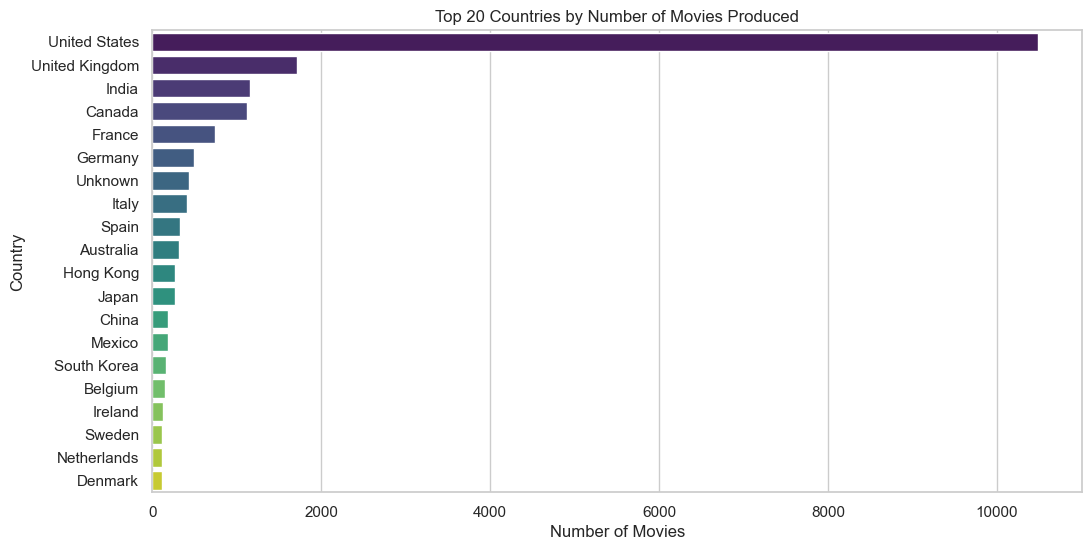

In [18]:
# Create a new feature: number of platforms each movie is available on
data['Number of Platforms'] = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

# Create a new feature: whether a movie is available on all platforms
data['Available on All Platforms'] = (data['Number of Platforms'] == 4)

# Calculate number of movies produced by each country
# Flatten the countries list into a single series
countries_flat = data['Country'].str.split(',').explode().str.strip()
country_counts = countries_flat.value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Movies']

# Visualize number of movies produced by each country
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Movies', y='Country', data=country_counts.head(20), palette='viridis')
plt.title('Top 20 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()


C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\4111795868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres', y='IMDb', data=data_exploded, palette='coolwarm')


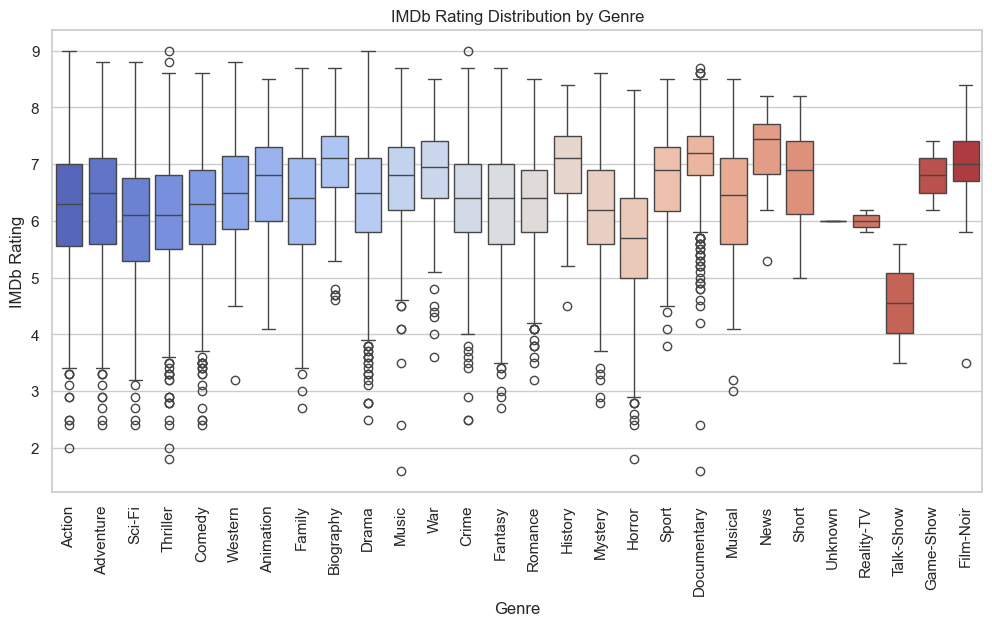

C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\4111795868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genres', y='Rotten Tomatoes', data=data_exploded, palette='coolwarm')


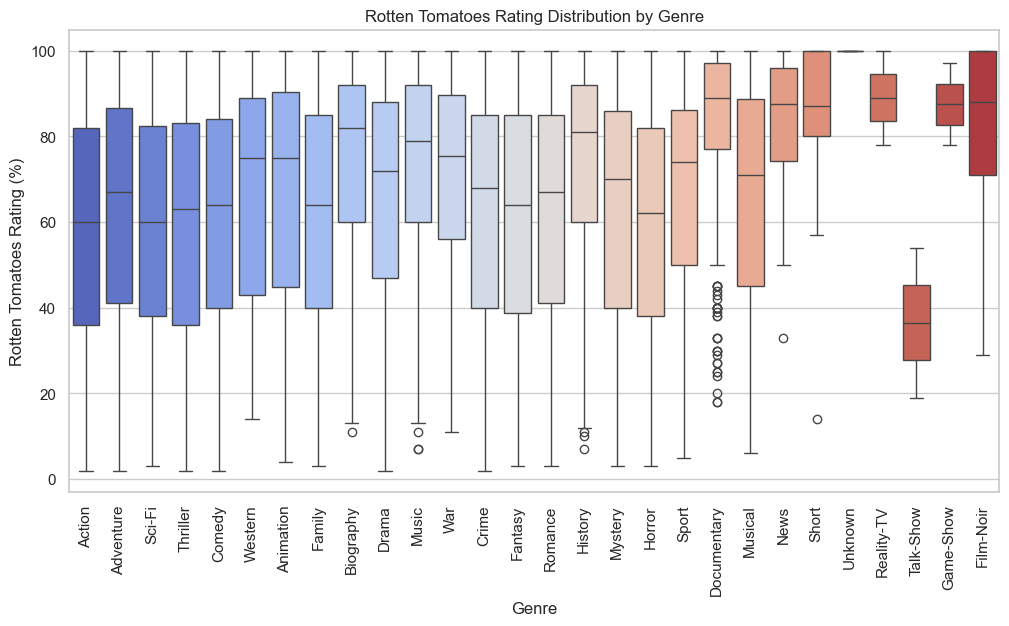

In [19]:
# IMDb rating distribution by genre
# Explode the Genres column
data_exploded = data.copy()
data_exploded['Genres'] = data_exploded['Genres'].str.split(',')
data_exploded = data_exploded.explode('Genres').dropna()
data_exploded['Genres'] = data_exploded['Genres'].str.strip()

# IMDb rating distribution by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genres', y='IMDb', data=data_exploded, palette='coolwarm')
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90)
plt.show()

# Rotten Tomatoes rating distribution by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genres', y='Rotten Tomatoes', data=data_exploded, palette='coolwarm')
plt.title('Rotten Tomatoes Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rotten Tomatoes Rating (%)')
plt.xticks(rotation=90)
plt.show()

In [20]:
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Explode the multi-value columns
data_exploded = data.copy()
data_exploded['Genres'] = data_exploded['Genres'].str.split(',')
data_exploded = data_exploded.explode('Genres').dropna()
data_exploded['Genres'] = data_exploded['Genres'].str.strip()

# Create additional features
data['Number of Platforms'] = data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)
data['Available on All Platforms'] = (data['Number of Platforms'] == 4)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Movie Streaming Platform Dashboard", style={'text-align': 'center'}),
    
    dcc.Dropdown(id="platform_dropdown",
                 options=[
                     {"label": "Netflix", "value": "Netflix"},
                     {"label": "Hulu", "value": "Hulu"},
                     {"label": "Prime Video", "value": "Prime Video"},
                     {"label": "Disney+", "value": "Disney+"}],
                 multi=True,
                 value=["Netflix"],
                 style={'width': "60%"}
                 ),
    
    dcc.Graph(id='platform_bar', figure={}),
    dcc.Graph(id='genre_pie', figure={}),
    dcc.Graph(id='rating_scatter', figure={}),
    dcc.Graph(id='ratings_over_time', figure={}),
    dcc.Graph(id='country_bar', figure={}),
    dcc.Graph(id='director_performance', figure={}),
])

# Callback to update graphs
@app.callback(
    [Output('platform_bar', 'figure'),
     Output('genre_pie', 'figure'),
     Output('rating_scatter', 'figure'),
     Output('ratings_over_time', 'figure'),
     Output('country_bar', 'figure'),
     Output('director_performance', 'figure')],
    [Input('platform_dropdown', 'value')]
)
def update_graph(selected_platforms):
    # Filter data based on selected platforms
    filtered_data = data[data[selected_platforms].any(axis=1)]
    
    # Platform Distribution
    platform_counts = filtered_data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
    platform_bar = px.bar(platform_counts, x=platform_counts.index, y=platform_counts.values,
                          labels={'index': 'Platform', 'y': 'Number of Movies'},
                          title="Number of Movies per Platform")
    
    # Genre Distribution
    genres_flat = filtered_data['Genres'].str.split(',').explode().str.strip()
    genre_counts = genres_flat.value_counts()
    genre_pie = px.pie(genre_counts, names=genre_counts.index, values=genre_counts.values,
                       title="Genre Distribution")
    
    # IMDb vs Rotten Tomatoes Scatter Plot
    filtered_data_exploded = filtered_data.copy()
    filtered_data_exploded['Genres'] = filtered_data_exploded['Genres'].str.split(',')
    filtered_data_exploded = filtered_data_exploded.explode('Genres').dropna()
    filtered_data_exploded['Genres'] = filtered_data_exploded['Genres'].str.strip()
    rating_scatter = px.scatter(filtered_data_exploded, x='IMDb', y='Rotten Tomatoes',
                                color='Genres', title="IMDb vs Rotten Tomatoes Ratings",
                                labels={'IMDb': 'IMDb Rating', 'Rotten Tomatoes': 'Rotten Tomatoes %'})
    
    # Ratings Over Time
    yearly_rotten_tomatoes = data.groupby('Year')['Rotten Tomatoes'].mean().reset_index()
    ratings_over_time = px.line(yearly_rotten_tomatoes, x='Year', y='Rotten Tomatoes',
                                title='Average Rotten Tomatoes Score by Year',
                                labels={'Rotten Tomatoes': 'Average Rotten Tomatoes Score (%)'})
    
    # Country Distribution
    countries_flat = filtered_data['Country'].str.split(',').explode().str.strip()
    country_counts = countries_flat.value_counts().reset_index()
    country_counts.columns = ['Country', 'Number of Movies']
    country_bar = px.bar(country_counts.head(20), x='Number of Movies', y='Country', orientation='h',
                         title='Top 20 Countries by Number of Movies')
    
    # Director Performance
    directors_flat = filtered_data['Directors'].str.split(',').explode().str.strip()
    director_counts = directors_flat.value_counts().reset_index()
    director_counts.columns = ['Director', 'Number of Movies']
    director_performance = px.bar(director_counts.head(20), x='Number of Movies', y='Director', orientation='h',
                                  title='Top 20 Directors by Number of Movies')
    
    return platform_bar, genre_pie, rating_scatter, ratings_over_time, country_bar, director_performance

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\3743705763.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Eins\AppData\Local\Temp\ipykernel_4380\3743705763.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [21]:
# Explode the Genres column
data_exploded = data.copy()
data_exploded['Genres'] = data_exploded['Genres'].str.split(',')
data_exploded = data_exploded.explode('Genres').dropna()
data_exploded['Genres'] = data_exploded['Genres'].str.strip()
data_exploded

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Number of Platforms,Available on All Platforms
0,1,Inception,2010,13+,8.8,87.0,True,False,False,False,Christopher Nolan,Action,"United States,United Kingdom","English,Japanese,French",148.0,1,False
0,1,Inception,2010,13+,8.8,87.0,True,False,False,False,Christopher Nolan,Adventure,"United States,United Kingdom","English,Japanese,French",148.0,1,False
0,1,Inception,2010,13+,8.8,87.0,True,False,False,False,Christopher Nolan,Sci-Fi,"United States,United Kingdom","English,Japanese,French",148.0,1,False
0,1,Inception,2010,13+,8.8,87.0,True,False,False,False,Christopher Nolan,Thriller,"United States,United Kingdom","English,Japanese,French",148.0,1,False
1,2,The Matrix,1999,18+,8.7,87.0,True,False,False,False,"Lana Wachowski,Lilly Wachowski",Action,United States,English,136.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16719,16720,Pocahontas,1995,Unknown,5.3,55.0,False,False,False,True,"Mike Gabriel,Eric Goldberg",Adventure,United States,"English,Algonquin",81.0,1,False
16719,16720,Pocahontas,1995,Unknown,5.3,55.0,False,False,False,True,"Mike Gabriel,Eric Goldberg",Drama,United States,"English,Algonquin",81.0,1,False
16719,16720,Pocahontas,1995,Unknown,5.3,55.0,False,False,False,True,"Mike Gabriel,Eric Goldberg",Family,United States,"English,Algonquin",81.0,1,False
16719,16720,Pocahontas,1995,Unknown,5.3,55.0,False,False,False,True,"Mike Gabriel,Eric Goldberg",Musical,United States,"English,Algonquin",81.0,1,False


In [23]:
import pandas as pd

# Load the dataset
data = pd.read_excel('MoviesOnStreamingPlatform.xlsx')

# Helper function to explode multivalue columns
def explode_multivalue_column(df, column_name):
    df[column_name] = df[column_name].str.split(',')
    return df.explode(column_name).reset_index(drop=True)

# Apply the function to the relevant columns
data = explode_multivalue_column(data, 'Directors')
data = explode_multivalue_column(data, 'Genres')
data = explode_multivalue_column(data, 'Country')
data = explode_multivalue_column(data, 'Language')

# Strip any leading/trailing whitespace from the values
data['Directors'] = data['Directors'].str.strip()
data['Genres'] = data['Genres'].str.strip()
data['Country'] = data['Country'].str.strip()
data['Language'] = data['Language'].str.strip()

# Display the transformed dataset
data


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,English,148.0
1,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,Japanese,148.0
2,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,French,148.0
3,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,English,148.0
4,1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,Japanese,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82629,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,Neil Gelinas,Documentary,United States,English,NaN
82630,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,Richard Slater-Jones,Documentary,United States,English,NaN
82631,16744,In Beaver Valley,1950,NaN,NaN,NaN,0,0,0,1,James Algar,Documentary,United States,English,32.0
82632,16744,In Beaver Valley,1950,NaN,NaN,NaN,0,0,0,1,James Algar,Short,United States,English,32.0
